In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy

In [4]:
data=pandas.read_csv(r"C:\Users\Roboindia\Desktop\Aashish\fer2013.csv")

In [5]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [15]:
img=data['pixels']

In [16]:
img=img.transform(lambda x:numpy.array(x.split(' '),dtype='uint8'))

In [18]:
type(img)
img.head()

0    [70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...
1    [151, 150, 147, 155, 148, 133, 111, 140, 170, ...
2    [231, 212, 156, 164, 174, 138, 161, 173, 182, ...
3    [24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...
4    [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...
Name: pixels, dtype: object

In [19]:
img=numpy.array(img)

In [24]:
img=img.tolist()
img[:5]

[array([ 70,  80,  82, ..., 106, 109,  82], dtype=uint8),
 array([151, 150, 147, ..., 193, 183, 184], dtype=uint8),
 array([231, 212, 156, ...,  88, 110, 152], dtype=uint8),
 array([ 24,  32,  36, ..., 142, 143, 142], dtype=uint8),
 array([ 4,  0,  0, ..., 30, 29, 30], dtype=uint8)]

In [26]:
img[10].shape

(2304,)

In [27]:
img=numpy.concatenate(img).reshape(-1,2304)

In [28]:
img.shape

(35887, 2304)

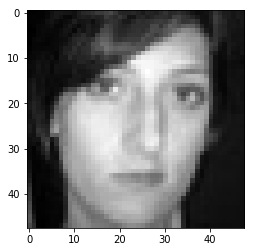

In [41]:
plt.imshow(img[35078].reshape(48,48),cmap='gray')
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
labels=['angry','disgust','fear','happy','sad','surprise','neutral']

In [4]:
#load the data
with open(r"C:\Users\Roboindia\Desktop\Aashish\fer2013.csv") as file:
    content=file.readlines()
    
data=numpy.array(content)

In [5]:
print(data.size)
print(len(data[1].split(',')[1].split(" ")))

35888
2304


In [6]:
xtrain=[]
xtest=[]
ytrain=[]
ytest=[]

In [7]:
for i in range(1,data.size):
    emotion,img,usage=data[i].split(',')
    pixels=img.split(' ')
    pixels=numpy.array(pixels,'float32')
    emotion=utils.to_categorical(emotion,len(labels))
    if 'Training' in usage:
        xtrain.append(pixels)
        ytrain.append(emotion)
    elif 'Public' in usage:
        xtest.append(pixels)
        ytest.append(emotion)

In [8]:
xtrain=numpy.array(xtrain,'float32')
xtest=numpy.array(xtest,'float32')
ytrain=numpy.array(ytrain,'float32')
ytest=numpy.array(ytest,'float32')

In [9]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(28709, 2304)
(3589, 2304)
(28709, 7)
(3589, 7)


In [10]:
xtrain[0]

array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32)

In [11]:
#normalize the pixels values between 0 to 1
xtrain=xtrain/255
xtest=xtest/255

In [12]:
xtrain=xtrain.reshape(28709,48,48,1)
xtest=xtest.reshape(3589,48,48,1)

In [13]:
xtest.dtype

dtype('float32')

# Convolutional Neural Network

In [67]:
model=models.Sequential()

In [68]:
#1st layer for FD
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),input_shape=(48,48,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))

In [69]:
#2nd layer of FD
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(3,3),strides=(2,2)))

In [70]:
#2nd layer of FD
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

In [71]:
model.add(layers.Flatten())

In [72]:
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(7,activation='softmax'))

In [73]:
#compile the neural network
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
gen=image.ImageDataGenerator()
train_data=gen.flow(xtrain,ytrain,batch_size=256)

In [75]:
#train the algorithm
model.fit_generator(train_data,steps_per_epoch=256,epochs=50,verbose=True,validation_data=[xtest,ytest])

Epoch 1/50
256/256 [==============================] - 19s 74ms/step - loss: 1.6805 - acc: 0.3236 - val_loss: 1.4735 - val_acc: 0.4271
Epoch 2/50
256/256 [==============================] - 17s 66ms/step - loss: 1.3661 - acc: 0.4777 - val_loss: 1.3292 - val_acc: 0.4929
Epoch 3/50
256/256 [==============================] - 17s 65ms/step - loss: 1.2056 - acc: 0.5424 - val_loss: 1.2113 - val_acc: 0.5383
Epoch 4/50
256/256 [==============================] - 17s 65ms/step - loss: 1.0990 - acc: 0.5876 - val_loss: 1.1881 - val_acc: 0.5534
Epoch 5/50
256/256 [==============================] - 17s 66ms/step - loss: 0.9755 - acc: 0.6369 - val_loss: 1.1943 - val_acc: 0.5595
Epoch 6/50
256/256 [==============================] - 17s 66ms/step - loss: 0.8399 - acc: 0.6912 - val_loss: 1.3130 - val_acc: 0.5581
Epoch 7/50
256/256 [==============================] - 17s 66ms/step - loss: 0.6755 - acc: 0.7559 - val_loss: 1.3644 - val_acc: 0.5653
Epoch 8/50
256/256 [==============================] - 17s 67ms

In [79]:
img=image.load_img(r"C:\Users\Roboindia\Desktop\Aashish\image.jpg",grayscale=True,target_size=(48,48))
img=image.img_to_array(img)
img=numpy.expand_dims(img,axis=0)
img=img/255
model.predict(img)

array([[1.2906981e-03, 5.0159711e-01, 7.6383790e-03, 3.0879690e-09,
        3.2444414e-06, 4.8944077e-01, 2.9823606e-05]], dtype=float32)

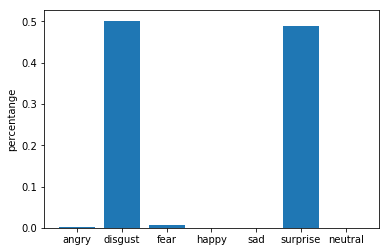

In [80]:
plt.bar(numpy.arange(7),model.predict(img)[0])
plt.xticks(numpy.arange(7),labels)
plt.ylabel('percentange')
plt.show()

In [81]:
labels[model.predict_classes(img)[0]]

'disgust'